In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df= pd.DataFrame()

# df = pd.read_csv('/content/drive/MyDrive/deep leaning 2nd course /texts_train.txt', sep="\t", encoding='UTF-8',header=0)
# df['grade'] = pd.read_csv('/content/drive/MyDrive/deep leaning 2nd course /scores_train.txt', sep="\t", encoding='UTF-8',header=0)

df = pd.read_csv('texts_train.txt', sep="\t", encoding='UTF-8',header=0)
df['grade'] = pd.read_csv('scores_train.txt', sep="\t", encoding='UTF-8',header=0)

df.columns = ['comment', 'grade']
print(df.head())

                                             comment  grade
0  думал, что будет лучше идея очень интересна - ...      7
1  с творчеством Головачева я познакомился посред...     10
2  то-то я и в большое неудовольствие прочитал "А...      5
3  как мне показалось местами сильно смахивает на...      6
4  от первой части книги просто оторваться не мог...      9


In [ ]:
import numpy as np
unique_grades = np.sort(df['grade'].unique())
print('all unique grades: ',unique_grades)
unique_grades  = [1,2,3,4,5,6,7,8,9,10]
print('new unique grades: ',unique_grades)

all unique grades:  [ 1  2  3  4  5  6  7  8  9 10]
new unique grades:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
df_new = pd.DataFrame()
comment = []
grade = []

for grades in unique_grades:
    counter = 0
    for i in range(len(df)):
    #for i in range(000/(len(unique_grades))):
        if (counter<300):
            if (grades == df['grade'][i]):
                comment.append(df['comment'][i])
                grade.append(df['grade'][i])
                counter = counter + 1 
df_new['comment'] = comment
#Заменим значения оценок на 1,2,3 
#Это облегчит подсчет ошибки 
#1 - негативный отзыв
#2 - нейтральный 
#3 - положительный
df_new['grade'] = grade
df_new['grade'] = df_new['grade'].replace(1, 0).replace(2, 0).replace(3, 0)
#df_new['grade'] = 
df_new['grade'] = df_new['grade'].replace(10, 1).replace(9, 1).replace(8, 1)

df_new['grade'] = df_new['grade'].replace(4, 2).replace(5, 2).replace(6, 2).replace(7, 2)

print('new unique grades: ',np.sort(df_new['grade'].unique()))
print(df_new.head())

new unique grades:  [0 1 2]
                                             comment  grade
0  Хотелось долго плеваться после того как я с тр...      0
1  ИМХО, в серии о Свароге Бушков исписался. Если...      0
2  Много был наслышан об этом авторе и вот взялся...      0
3  Да, тяжело читать безграмотную фэнтези. Хотя, ...      0
4  Попытка свести сюжет предыдущих книг в единое ...      0


In [ ]:
print(df_new.tail())

                                                comment  grade
2825  книга не похожа ни на одну из тех,что вы читал...      1
2826  к Есенину у меня любовь не просто как к поэту,...      1
2827  очень чувственно, с болью, настоящей мужской б...      1
2828  назовите мне писателя, хотя бы близко напомина...      1
2829  несмотря на то,что поэзия Пастернака не произв...      1


In [ ]:
print(df_new[1250:1260])

                                                comment  grade
1250  Вялые попытки Перумова склеить в одно скандина...      2
1251  Редкостная тягомотина. Нагромождение людских п...      2
1252  Читать не задумываясь, может быть, и можно. Но...      2
1253  Занудно, и не о чем. Главный герой супер маг и...      2
1254  Псевдофилосовская поделка. Для любителей найти...      2
1255  Да, в книге написаны правильные хорошие вещи.Н...      2
1256  Прочитала только эту книгу о ГП. Отношение оче...      2
1257  Говорящий дог (в прошлой жизни - английский ло...      2
1258  Знаменитые музыканты, случается, выпускают бес...      2
1259  Заслуживает внимания, местами очень интересно....      2


In [ ]:
df_new.to_csv('treeclasses_sorted_comments.csv', sep = '|') #save this dataset to csv

In [ ]:
array_of_mean_thensors = []
grade = []
comment = []
uncomtiled_rows = 0
for i in range(len(df_new)):
    try: 
        grade.append(df_new['grade'][i])
        comment.append(df_new['comment'][i])
    except:
        #in some cases, from my point of view, when comment is too large, the data has not processed, and it cause some errors
        uncomtiled_rows = uncomtiled_rows + 1
        #print('Too long or to short comment')

In [ ]:
print(comment[1250],' ',grade[1250])

Вялые попытки Перумова склеить в одно скандинавскую и древнегреческую мифологию позабавили. Подробные описания, как и чего наколдовал мятежный колдун, кого и насколько жестоко завоевал его ученик, довольно интересны, но слишком их много. Идея? Она у Перумова, по-моему, одна на все книги. Запали в душу: 1) момент появления у Хагена ученика (как он бережно помогал ему родиться); 2)образ Демогоргона - собрания страдающих душ.   2


In [ ]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def preproccessing(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in punctuation])
    text = text.split(' ')
    #print ('Number of reviews :', len(text))
    return text 

In [ ]:
tokenized_corpus = [preproccessing(i) for i in comment ]

In [ ]:
tokenized_corpus[:2]

[['хотелось',
  'долго',
  'плеваться',
  'после',
  'того',
  'как',
  'я',
  'с',
  'трудом',
  'осилил',
  'половину',
  'книги',
  'на',
  'этом',
  'моё',
  'увлечения',
  'творчеством',
  'никитина',
  'было',
  'закончено',
  'я',
  'даже',
  'не',
  'захотел',
  'читать',
  'уже',
  'купленную',
  'книгу',
  'изгой',
  'из',
  'любимого',
  'некогда',
  'цикла',
  'трое',
  'из',
  'леса'],
 ['имхо',
  'в',
  'серии',
  'о',
  'свароге',
  'бушков',
  'исписался',
  'если',
  'первые',
  'две',
  'книги',
  'еще',
  'читать',
  'интересно',
  'то',
  'остальное',
  'в',
  'общем',
  'сварога',
  'пора',
  'убивать']]

In [ ]:
totalVocabs = []
for sentence in tokenized_corpus:
    for token in sentence:
        totalVocabs.append(token)

print("total = ", len(totalVocabs))

total =  73151


In [ ]:
print("sentences = ", len(tokenized_corpus))

sentences =  2175


In [ ]:
print("grades = ", len(grade))

grades =  2175


In [ ]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

vocabulary_size = len(vocabulary)
print(vocabulary)

['хотелось', 'долго', 'плеваться', 'после', 'того', 'как', 'я', 'с', 'трудом', 'осилил', 'половину', 'книги', 'на', 'этом', 'моё', 'увлечения', 'творчеством', 'никитина', 'было', 'закончено', 'даже', 'не', 'захотел', 'читать', 'уже', 'купленную', 'книгу', 'изгой', 'из', 'любимого', 'некогда', 'цикла', 'трое', 'леса', 'имхо', 'в', 'серии', 'о', 'свароге', 'бушков', 'исписался', 'если', 'первые', 'две', 'еще', 'интересно', 'то', 'остальное', 'общем', 'сварога', 'пора', 'убивать', 'много', 'был', 'наслышан', 'об', 'авторе', 'и', 'вот', 'взялся', 'прочесть', 'сказать', 'что', 'книга', 'разочаровала', '', 'ничего', 'смысловые', 'ляпы', 'каждом', 'шагу', 'например', 'команда', 'огонь', 'при', 'стрельбе', 'луков', 'мире', 'где', 'нет', 'индивидуального', 'огнестрельного', 'оружия', 'тд', 'громоздкий', 'вычурный', 'язык', 'отсутствие', 'концовки', 'путешествие', 'неизвестно', 'куда', 'зачем', 'слабая', 'мотивация', 'поступков', 'героев', 'гораздо', 'ниже', 'среднего', 'теперь', 'начинаю', 'пон

In [ ]:
word2idx = {w: idx+1 for (idx, w) in enumerate(vocabulary)}

In [ ]:
idx2word = {idx+1: w for (idx, w) in enumerate(vocabulary)}


In [ ]:
len(vocabulary)

18380

In [ ]:
len(set(vocabulary))

18380

In [ ]:
word2idx

{'хотелось': 1,
 'долго': 2,
 'плеваться': 3,
 'после': 4,
 'того': 5,
 'как': 6,
 'я': 7,
 'с': 8,
 'трудом': 9,
 'осилил': 10,
 'половину': 11,
 'книги': 12,
 'на': 13,
 'этом': 14,
 'моё': 15,
 'увлечения': 16,
 'творчеством': 17,
 'никитина': 18,
 'было': 19,
 'закончено': 20,
 'даже': 21,
 'не': 22,
 'захотел': 23,
 'читать': 24,
 'уже': 25,
 'купленную': 26,
 'книгу': 27,
 'изгой': 28,
 'из': 29,
 'любимого': 30,
 'некогда': 31,
 'цикла': 32,
 'трое': 33,
 'леса': 34,
 'имхо': 35,
 'в': 36,
 'серии': 37,
 'о': 38,
 'свароге': 39,
 'бушков': 40,
 'исписался': 41,
 'если': 42,
 'первые': 43,
 'две': 44,
 'еще': 45,
 'интересно': 46,
 'то': 47,
 'остальное': 48,
 'общем': 49,
 'сварога': 50,
 'пора': 51,
 'убивать': 52,
 'много': 53,
 'был': 54,
 'наслышан': 55,
 'об': 56,
 'авторе': 57,
 'и': 58,
 'вот': 59,
 'взялся': 60,
 'прочесть': 61,
 'сказать': 62,
 'что': 63,
 'книга': 64,
 'разочаровала': 65,
 '': 66,
 'ничего': 67,
 'смысловые': 68,
 'ляпы': 69,
 'каждом': 70,
 'шагу': 71

In [ ]:
idx2word

In [ ]:
comment_in_num = []
for sentence in tokenized_corpus:
    comment_in_num.append([word2idx[word] for word in sentence])

In [ ]:
print(comment_in_num[:1])

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 7, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 29, 34]]


In [ ]:
len(comment_in_num)

2830

In [ ]:
len(comment_in_num) == len(tokenized_corpus) == len(grade)

True

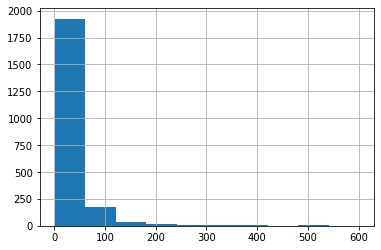

count    2175.000000
mean       33.632644
std        50.151534
min         1.000000
25%        11.000000
50%        21.000000
75%        37.500000
max       601.000000
dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
comment_len = [len(x) for x in comment_in_num]
pd.Series(comment_len).hist()
plt.show()
pd.Series(comment_len).describe()

In [ ]:
def pad_features(reviews_int, seq_length):
    #Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [ ]:
features = pad_features(comment_in_num, 33)

In [ ]:
features

array([[    1,     2,     3, ...,    30,    31,    32],
       [    0,     0,     0, ...,    50,    51,    52],
       [   53,    54,    55, ...,    36,    78,    79],
       ...,
       [    0,     0,     0, ...,  1605, 18375,   394],
       [    0,     0,     0, ...,   153, 15262,  1403],
       [ 6815,    13, 18336, ...,    13,  3899, 12672]])

In [ ]:
print("features len = ", len(features))

features len =  2830


In [ ]:
print("grades len = ", len(grade))

grades len =  3000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(features),np.array(grade), test_size=0.2, random_state=42)

In [ ]:
len(X_train)

1740

In [ ]:
len(y_train)

2400

In [ ]:
import os

In [ ]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
# train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
# test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_data = TensorDataset(torch.cuda.FloatTensor(X_train), torch.cuda.LongTensor(y_train))
test_data = TensorDataset(torch.cuda.FloatTensor(X_test), torch.cuda.LongTensor(y_test))

# dataloaders
batch_size = 5
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([5, 33])
Sample input: 
 tensor([[7.0000e+00, 8.9800e+02, 6.3000e+01, 1.0681e+04, 8.6800e+02, 2.2000e+01,
         1.0740e+03, 1.0682e+04, 1.0683e+04, 2.2380e+03, 1.0684e+04, 6.2690e+03,
         2.3200e+02, 1.0685e+04, 1.0686e+04, 1.3000e+01, 2.1000e+02, 4.5280e+03,
         1.2060e+03, 1.0687e+04, 4.1100e+02, 1.4640e+03, 1.2060e+03, 1.0688e+04,
         1.0689e+04, 2.2400e+02, 9.3000e+01, 6.8410e+03, 8.2400e+02, 1.0690e+04,
         2.8500e+03, 1.2500e+02, 1.2540e+03],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 6.4000e+01, 1.7012e+04, 1.7722e+04, 1.7723e+04, 5.8000e+01,
         1.7724e+04, 1.1079e+04, 1.7725e+04, 7.8200e+02, 3.6070e+03, 1.0558e+04,
         1.7726e+04, 2.1200e+02, 7.8200e+02, 5.8000e+01, 5.2800e+02, 4.8500e+02,
         8.0000e+00, 1.5276e+04, 1.7727e+04],
        [0.0000e+00, 0.0000e+00, 0.0000e+0

![image.png](attachment:image.png)

<li>0. Tokenize : This is not a layer for LSTM network but a mandatory step of converting our words into tokens (integers)
<li>Embedding Layer: that converts our word tokens (integers) into embedding of specific size
<li>LSTM Layer: defined by hidden state dims and number of layers
<li>Fully Connected Layer: that maps output of LSTM layer to a desired output size
<li>Sigmoid Activation Layer: that turns all output values in a value between 0 and 1
<li>Output: Sigmoid output from the last timestep is considered as the final output of this network

In [ ]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()
        

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim


        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        
        self.dropout = nn.Dropout(0.2)
        
        self.linear = nn.Linear(hidden_dim, 3)


        
    def forward(self, x):
        x = self.embeddings(x)
        x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        
        return self.linear(ht[-1])
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
    
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocabulary)+1 # +1 for the 0 padding
output_size = 3
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)


SentimentLSTM(
  (embeddings): Embedding(18381, 400, padding_idx=0)
  (lstm): LSTM(400, 256, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear): Linear(in_features=256, out_features=3, bias=True)
)


In [ ]:
import tqdm 
# loss and optimization functions
lr=0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), lr=lr)

counter = 0
print_every = 10
clip=5 # gradient clipping

# move model to GPU, if available
train_on_gpu = True
if(train_on_gpu):
    net.cuda()

net.train()
losses = []
epochs = 10
# train for some number of epochs
for e in tqdm.tqdm (range(epochs)):

    # hidden = net.init_hidden(batch_size)

    loss_ = []
    # batch loop
    for inputs, labels in train_loader:
        net.train()
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()


        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.cuda.LongTensor)
        # print("input before NN", inputs)

        # output = net(inputs, hidden)
        output = net(inputs)      

        loss = criterion(output.squeeze(), labels.long())
        loss.backward()
        
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        
        optimizer.step()

        loss_.append(loss.item())

    losses.append(np.mean(loss_))      

  0%|          | 0/10 [00:00<?, ?it/s]

output =  tensor([[-2.5867,  3.3673, -1.7649],
        [-2.6296,  2.0658, -0.0269],
        [-2.1288, -2.4306,  4.2926],
        [ 3.7883, -2.1787, -1.0259],
        [-0.3692, -1.9826,  1.8042]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([1, 1, 2, 0, 2], device='cuda:0')
output =  tensor([[-1.0665,  1.9047, -1.3532],
        [ 2.3857, -2.6700,  0.4924],
        [-1.3613, -1.7053,  2.8073],
        [-2.7595,  3.1734, -1.5543],
        [ 3.1725, -1.8545, -0.8758]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([1, 0, 2, 1, 0], device='cuda:0')
output =  tensor([[-3.3067, -1.0330,  3.2833],
        [-0.2166, -1.3395,  1.7732],
        [ 1.4797, -0.9279, -0.6481],
        [-1.4361,  2.7876, -1.5619],
        [ 2.7741, -3.2917,  0.9598]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([2, 2, 0, 1, 0], device='cuda:0')
output =  tensor([[-0.6401,  2.5270, -1.9857],
        [-3.7281, -0.6708,  3.3711],
        [-1.2043, -2.0017,  2.7094],
        [ 3.

 10%|█         | 1/10 [00:06<00:57,  6.38s/it]

output =  tensor([[-2.2771, -3.9326,  5.2006],
        [-1.9066, -2.7214,  4.2129],
        [-1.7332, -2.9091,  3.5965],
        [ 2.8558, -3.5210,  0.9767],
        [ 6.9332, -4.3518, -1.2027]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([2, 2, 2, 0, 0], device='cuda:0')
output =  tensor([[-3.0237,  0.7117,  1.6907],
        [-1.5744, -1.6195,  2.3859],
        [-0.9487, -0.2286,  0.6205],
        [-0.8869,  3.0556, -2.2749],
        [-2.2931, -1.8967,  3.0899]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([2, 2, 2, 1, 2], device='cuda:0')
output =  tensor([[-2.2954,  3.6516, -1.5623],
        [-3.3603, -2.1681,  4.1400],
        [-4.3959,  6.3153, -2.7552],
        [ 2.3432, -4.4883,  2.2494],
        [-1.5425, -3.8140,  4.2662]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([1, 2, 1, 0, 2], device='cuda:0')
output =  tensor([[-3.3273, -4.6309,  6.4415],
        [-1.7884, -3.2423,  4.0545],
        [-1.1887, -5.0668,  4.6893],
        [-1.

 20%|██        | 2/10 [00:12<00:50,  6.29s/it]

labels =  tensor([2, 2, 2, 1, 1], device='cuda:0')
output =  tensor([[ 5.5042, -2.2909, -1.6657],
        [-6.2946,  6.7784, -1.8839],
        [-4.6028, -6.0507,  8.3019],
        [-1.6901, -2.9175,  3.8144],
        [-2.4262, -3.6705,  5.1168]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([0, 1, 2, 2, 2], device='cuda:0')
output =  tensor([[-2.0650,  0.1586,  1.0518],
        [-3.2738, -3.3483,  5.4380],
        [-5.9782, -1.8178,  5.1674],
        [-0.2263, -2.1948,  2.0208],
        [-3.1710,  5.8946, -3.3089]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([2, 2, 2, 2, 1], device='cuda:0')
output =  tensor([[-7.1442e+00,  7.8013e+00, -2.1833e+00],
        [ 5.6314e+00, -1.4459e+00, -2.9396e+00],
        [-5.9981e+00,  5.4178e+00, -8.3721e-01],
        [-3.3828e-03, -4.8346e+00,  4.4410e+00],
        [-4.1623e+00, -6.0414e+00,  8.6128e+00]], device='cuda:0',
       grad_fn=<AddmmBackward>)
labels =  tensor([1, 0, 1, 2, 2], device='cuda:0')
output =  tenso

 30%|███       | 3/10 [00:18<00:44,  6.29s/it]

output =  tensor([[-3.6763,  4.1412, -1.4750],
        [-0.1162,  2.8945, -2.3638],
        [-4.9156, -2.7782,  6.0079],
        [-3.5829,  5.5860, -2.3859],
        [-1.8303, -1.5204,  2.6753]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([1, 1, 2, 1, 2], device='cuda:0')
output =  tensor([[-4.0163,  4.9385, -1.7055],
        [-5.7098,  9.0401, -4.2481],
        [-2.3599,  0.2044,  1.5816],
        [-3.9770,  6.0453, -3.4993],
        [-5.4269,  6.6929, -2.3701]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([1, 1, 2, 1, 1], device='cuda:0')
output =  tensor([[-2.4070, -4.7149,  5.1286],
        [-3.7548,  6.5072, -3.6446],
        [-2.6892, -5.3311,  6.4783],
        [-8.5192,  8.0906, -1.7867],
        [-4.3891,  7.1507, -3.8249]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([2, 1, 2, 1, 1], device='cuda:0')
output =  tensor([[-3.3422,  4.3381, -1.2108],
        [-3.7614, -1.3778,  3.6293],
        [-2.8643, -8.2225,  9.4387],
        [-5.

 40%|████      | 4/10 [00:25<00:37,  6.28s/it]

output =  tensor([[-5.2036,  5.3749, -1.8488],
        [-4.5354,  5.5522, -2.3368],
        [-3.8242, -1.9794,  4.1443],
        [-4.9284,  6.5915, -2.8227],
        [-2.8055, -5.1211,  6.5285]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([1, 1, 2, 1, 2], device='cuda:0')
output =  tensor([[-3.9722, -5.1161,  7.3451],
        [-1.2572, -4.4401,  4.9360],
        [-3.0062,  5.9837, -3.4466],
        [-1.9127, -3.9591,  4.3945],
        [-4.0445,  0.2914,  2.4606]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([2, 2, 1, 2, 2], device='cuda:0')
output =  tensor([[-3.8800,  6.0170, -2.8535],
        [-4.2606,  6.4424, -3.2715],
        [-6.6851,  7.2218, -2.6947],
        [-4.1031,  6.2777, -2.8856],
        [-3.1765, -4.4859,  5.7868]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([1, 1, 1, 1, 2], device='cuda:0')
output =  tensor([[-3.7921,  4.0556, -0.9241],
        [-2.2377,  2.7969, -1.0390],
        [-3.8767, -4.4952,  6.4295],
        [-4.

 50%|█████     | 5/10 [00:31<00:31,  6.29s/it]

tensor([2, 0, 1, 2, 2], device='cuda:0')
output =  tensor([[-2.1269, -4.4575,  4.8496],
        [-3.9807,  4.4498, -1.9876],
        [-4.3714,  5.2090, -1.8753],
        [-5.3051,  4.8757, -0.9337],
        [-3.2340, -4.8456,  6.6824]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([2, 1, 1, 1, 2], device='cuda:0')
output =  tensor([[-6.1217, -3.2090,  6.8662],
        [-5.8949,  7.3014, -2.9810],
        [-1.7136, -7.4841,  7.8469],
        [-4.2023, -3.3362,  5.6533],
        [ 7.6312, -4.9013, -0.8476]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([2, 1, 2, 2, 0], device='cuda:0')
output =  tensor([[ 9.3818, -5.4845, -2.1987],
        [-5.0699, -4.2802,  6.7263],
        [ 3.6308, -5.6577,  1.6786],
        [-3.2690,  4.6875, -2.1906],
        [-4.5045,  4.5874, -1.3916]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([0, 2, 0, 1, 1], device='cuda:0')
output =  tensor([[-3.6270, -6.4321,  8.0664],
        [-4.5264, -6.7335,  9.3306],
        

 60%|██████    | 6/10 [00:37<00:25,  6.29s/it]

output =  tensor([[-4.1274, -5.0778,  7.0219],
        [ 5.7736, -2.5996, -1.8709],
        [-3.0555, -5.6645,  7.0129],
        [-7.1732,  8.1716, -2.5001],
        [ 5.0937, -0.8541, -3.4023]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([2, 0, 2, 1, 0], device='cuda:0')
output =  tensor([[-4.3939, -5.1469,  7.4140],
        [-6.2964,  7.9494, -2.9847],
        [-6.4663,  8.8216, -3.1806],
        [-6.0150,  7.9821, -3.2639],
        [-3.7174, -4.7383,  6.9839]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([2, 1, 1, 1, 2], device='cuda:0')
output =  tensor([[-8.5776,  8.0903, -1.6165],
        [ 7.3287, -3.8548, -2.1426],
        [-5.8579, -4.8106,  7.5966],
        [-4.9484, -2.3801,  4.9663],
        [ 5.5592, -2.5340, -1.7313]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([1, 0, 2, 2, 0], device='cuda:0')
output =  tensor([[-4.6033, -5.2112,  6.8639],
        [-7.4429,  8.5510, -2.4442],
        [-5.0520, -3.7453,  6.2101],
        [-4.

 70%|███████   | 7/10 [00:44<00:18,  6.29s/it]

output =  tensor([[-4.4045,  6.5196, -3.0208],
        [-6.5235,  9.7360, -4.3764],
        [-2.1596, -7.2887,  7.4013],
        [-6.8826, -2.6993,  5.7344],
        [-7.9984, -2.5452,  7.4573]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([1, 1, 2, 2, 2], device='cuda:0')
output =  tensor([[-5.1500, -4.1775,  6.7389],
        [ 7.9151, -3.7792, -2.5638],
        [-4.4005,  7.3745, -3.4782],
        [-5.3107, -6.6013,  9.1265],
        [-5.3648, 10.4089, -5.8103]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([2, 0, 1, 2, 1], device='cuda:0')
output =  tensor([[-8.0434, -3.6942,  7.9940],
        [-4.0024, -3.0866,  5.5177],
        [ 5.6236, -0.8802, -2.7382],
        [-3.1617, -3.2423,  5.2721],
        [-4.7401, -8.6248, 10.5444]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([2, 2, 0, 2, 2], device='cuda:0')
output =  tensor([[-1.7877,  6.4682, -4.3801],
        [-2.0032,  2.6053, -0.6823],
        [-6.4924,  9.5298, -4.2981],
        [-3.

 80%|████████  | 8/10 [00:50<00:12,  6.29s/it]

tensor([[-5.3712,  6.8305, -2.2953],
        [ 8.1190, -4.9545, -0.8927],
        [-5.1150, -5.3659,  7.8156],
        [ 6.2150, -2.4532, -2.1613],
        [-4.2433, -2.9696,  5.2638]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([1, 0, 2, 0, 2], device='cuda:0')
output =  tensor([[ 5.0400, -3.0625, -1.2548],
        [-4.8673, -1.6885,  4.7040],
        [-5.5608,  7.7639, -3.3578],
        [-4.2061,  8.0604, -4.4272],
        [-4.5084, -4.7965,  6.8774]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([0, 2, 1, 1, 2], device='cuda:0')
output =  tensor([[ 4.9421, -2.3730, -1.5083],
        [-2.3374, -3.2359,  4.3170],
        [-4.5195, -6.4251,  8.7375],
        [-3.8481, -3.6757,  5.0073],
        [-5.7383,  9.1995, -4.5730]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([0, 2, 2, 2, 1], device='cuda:0')
output =  tensor([[-3.7708,  6.2984, -3.5331],
        [-6.4773, -4.6204,  8.2190],
        [-8.5376, -0.3868,  5.2667],
        [-5.1421,  8.3

 90%|█████████ | 9/10 [00:56<00:06,  6.29s/it]

tensor([1, 1, 2, 2, 1], device='cuda:0')
output =  tensor([[-5.1601, -3.9807,  6.9021],
        [-4.1321, -6.5675,  8.6041],
        [-4.9740,  8.9603, -4.9553],
        [-7.8754, -2.1250,  7.0602],
        [-4.3322, -6.8492,  8.6468]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([2, 2, 1, 2, 2], device='cuda:0')
output =  tensor([[  5.8864,  -3.2720,  -1.1248],
        [ -8.6357,  11.9372,  -4.6713],
        [ -2.6635,  -1.9128,   3.7578],
        [ 10.1905,  -6.0616,  -2.1554],
        [ -1.9678, -11.0999,  10.6836]], device='cuda:0',
       grad_fn=<AddmmBackward>)
labels =  tensor([0, 1, 2, 0, 2], device='cuda:0')
output =  tensor([[-2.5193,  4.9621, -3.2073],
        [-3.5773,  5.3667, -2.7137],
        [-5.8840,  6.7557, -2.3460],
        [-6.2317,  8.1702, -2.7879],
        [-6.5531,  7.4158, -2.5032]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([1, 1, 1, 1, 1], device='cuda:0')
output =  tensor([[ 3.9699, -0.6607, -2.5481],
        [-7.8826,  8.60

100%|██████████| 10/10 [01:02<00:00,  6.30s/it]

tensor([[-6.9468, -3.1532,  7.7138],
        [-3.5916,  5.6480, -2.7313],
        [-2.3584,  3.5636, -1.4248],
        [-4.4460,  9.2328, -5.1538],
        [-3.6841,  6.3293, -2.6341]], device='cuda:0', grad_fn=<AddmmBackward>)
labels =  tensor([2, 1, 1, 1, 1], device='cuda:0')


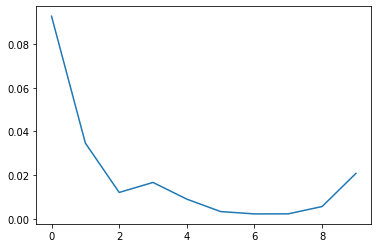

In [ ]:
plt.plot(range(len(losses)), losses, label='train')

In [ ]:
losses

[0.09275115064436291,
 0.03465742983259599,
 0.012047177742234693,
 0.01663319174580878,
 0.008983476023828168,
 0.00329098531997731,
 0.002214929153154472,
 0.002248580180911691,
 0.005595447702565555,
 0.020768348233604093]

In [ ]:
from sklearn.metrics import accuracy_score

def binary_accuracy(preds, y):
    #round predictions to the closest integer
    acc = accuracy_score(preds,y)
    return acc

In [ ]:
test_losses = [] # track loss
num_correct = 0

count = 0

# init hidden state
hidden = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    hidden = tuple([each.data for each in hidden])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output = net(inputs.long())
    
    # calculate loss
    loss = criterion(output.squeeze(), labels.long())
    # loss = criterion(output.squeeze(), labels.float())
    test_losses.append(loss.item())
    
    print("predict output = ",output)

    # pred = torch.max(output, 1)[1]
    pred = torch.argmax(output,1)
    print("predict output.squeeze = ",pred)

    print("labels = ",labels)

    # compare predictions to true label
    num_correct += (pred == labels.float().view_as(pred)).sum()

    count += 1
    print("count = ", count)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

predict output =  tensor([[-3.6859, -0.7085,  2.8083],
        [-4.8300, -3.6105,  6.8426],
        [-0.7869, -5.1030,  5.2163],
        [-6.3521, -8.0771, 11.1454],
        [ 1.9478, -0.5471, -1.1450]], device='cuda:0', grad_fn=<AddmmBackward>)
predict output.squeeze =  tensor([2, 2, 2, 2, 0], device='cuda:0')
labels =  tensor([1, 1, 2, 2, 1], device='cuda:0')
count =  1
predict output =  tensor([[-2.9569,  4.0298, -1.8624],
        [-4.6471, -3.0547,  5.7934],
        [-6.5782, -9.0388, 12.2674],
        [-0.5316,  2.0422, -1.4033],
        [-2.7760, -2.3890,  3.4375]], device='cuda:0', grad_fn=<AddmmBackward>)
predict output.squeeze =  tensor([1, 2, 2, 1, 2], device='cuda:0')
labels =  tensor([1, 1, 1, 2, 2], device='cuda:0')
count =  2
predict output =  tensor([[-1.4599,  2.9813, -1.6914],
        [-1.6915, -4.3012,  4.4515],
        [-5.1540, -2.7902,  5.5664],
        [ 1.4514, -2.2281,  1.0473],
        [ 1.9218, -7.6526,  5.4311]], device='cuda:0', grad_fn=<AddmmBackward>)
pred

In [ ]:
def predict(net, test_review, sequence_length=50):
    
    net.eval()
    
    # tokenize review
    test_words = preproccessing(test_review)
    test_ints = []
    test_ints.append([word2idx[word] for word in test_words])
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    # print(features)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    output = net(feature_tensor)
    pred = output

    # print custom response
    if(torch.argmax(pred,1)==1):
        print("++++ Positive review detected!")
    elif(torch.argmax(pred,1)==2):
        print("$$$$$ Neutral review detected.")
    else:
        print("---- Negative review detected.")


In [ ]:
predict(net, 'Ужасный фильм, мне не понравился, смотреть противно')

$$$$$ Neutral review detected.


In [ ]:
predict(net, 'очень хорошая книга')

++++ Positive review detected!


In [ ]:
predict(net, 'книга отстой')

$$$$$ Neutral review detected.


In [ ]:
predict(net, 'книга отстой? никогда не читайте')

$$$$$ Neutral review detected.


In [ ]:
predict(net, 'средненько',50)

$$$$$ Neutral review detected.


In [ ]:
predict(net, 'гавно фильм',50)

KeyError: ignored

In [ ]:
predict(net, 'очень хороший фильм',200)

++++ Positive review detected!


In [ ]:
predict(net, 'фильм понравился, но не сильно',200)

$$$$$ Neutral review detected.


In [ ]:
predict(net, 'фильм так себе',200)

---- Negative review detected.


In [ ]:
predict(net, 'фильм хороший всем рекомендую',200)

++++ Positive review detected!
